<a href="https://colab.research.google.com/github/Arifuzzaman-Swapnil/Concrete-Compressive-Strength-Prediction-/blob/main/Concrete_Compressive_Strength_Prediction_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Concrete Compressive Strength Prediction DATASET /Concrete_Data.csv')

In [ ]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [ ]:
# Rename columns for easier handling
data.columns = [
    "Cement", "Blast_Furnace_Slag", "Fly_Ash", "Water",
    "Superplasticizer", "Coarse_Aggregate", "Fine_Aggregate",
    "Age", "Strength"
]

In [ ]:
data.dtypes

,0
Cement,float64
Blast_Furnace_Slag,float64
Fly_Ash,float64
Water,float64
Superplasticizer,float64
Coarse_Aggregate,float64
Fine_Aggregate,float64
Age,int64
Strength,float64


In [ ]:
# Data Preprocessing

In [ ]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 1030
Number of attributes = 9
Number of missing values:
	Cement: 0
	Blast_Furnace_Slag: 0
	Fly_Ash: 0
	Water: 0
	Superplasticizer: 0
	Coarse_Aggregate: 0
	Fine_Aggregate: 0
	Age: 0
	Strength: 0


In [ ]:
print(data.isnull().sum())

Cement                0
Blast_Furnace_Slag    0
Fly_Ash               0
Water                 0
Superplasticizer      0
Coarse_Aggregate      0
Fine_Aggregate        0
Age                   0
Strength              0
dtype: int64


In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 25


In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of rows before discarding duplicates = 1030
Number of rows after discarding duplicates = 1005


In [ ]:
# Convert float columns to integers where applicable
float_cols = data.select_dtypes(include=["float"]).columns
data[float_cols] = data[float_cols].astype(int)

<ipython-input-180-5ac2cc02c479>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[float_cols] = data[float_cols].astype(int)


In [ ]:
print(data.dtypes)

Cement                int64
Blast_Furnace_Slag    int64
Fly_Ash               int64
Water                 int64
Superplasticizer      int64
Coarse_Aggregate      int64
Fine_Aggregate        int64
Age                   int64
Strength              int64
dtype: object


In [ ]:
data.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.400000,71.909453,55.391045,181.798010,5.774129,974.119403,772.413930,45.856716,34.748259
std,104.425965,86.057187,64.067159,21.443245,5.781180,77.531999,80.281339,63.734692,16.277759
min,102.000000,0.000000,0.000000,121.000000,0.000000,801.000000,594.000000,1.000000,2.000000
25%,190.000000,0.000000,0.000000,166.000000,0.000000,932.000000,724.000000,7.000000,23.000000
50%,265.000000,20.000000,0.000000,185.000000,6.000000,968.000000,780.000000,28.000000,33.000000
75%,349.000000,142.000000,118.000000,192.000000,10.000000,1031.000000,822.000000,56.000000,44.000000
max,540.000000,359.000000,200.000000,247.000000,32.000000,1145.000000,992.000000,365.000000,82.000000


In [ ]:
data.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
Cement,1.000000,-0.303600,-0.385238,-0.052894,0.062936,-0.085559,-0.244625,0.086440,0.489234
Blast_Furnace_Slag,-0.303600,1.000000,-0.312131,0.127312,0.030001,-0.278500,-0.290540,-0.042760,0.102389
Fly_Ash,-0.385238,-0.312131,1.000000,-0.283668,0.396242,-0.027689,0.088933,-0.158996,-0.081224
Water,-0.052894,0.127312,-0.283668,1.000000,-0.639232,-0.212409,-0.443553,0.280324,-0.268813
Superplasticizer,0.062936,0.030001,0.396242,-0.639232,1.000000,-0.252604,0.204306,-0.191100,0.341347
Coarse_Aggregate,-0.085559,-0.278500,-0.027689,-0.212409,-0.252604,1.000000,-0.163261,-0.004719,-0.144597
Fine_Aggregate,-0.244625,-0.290540,0.088933,-0.443553,0.204306,-0.163261,1.000000,-0.156231,-0.187288
Age,0.086440,-0.042760,-0.158996,0.280324,-0.191100,-0.004719,-0.156231,1.000000,0.338165
Strength,0.489234,0.102389,-0.081224,-0.268813,0.341347,-0.144597,-0.187288,0.338165,1.000000


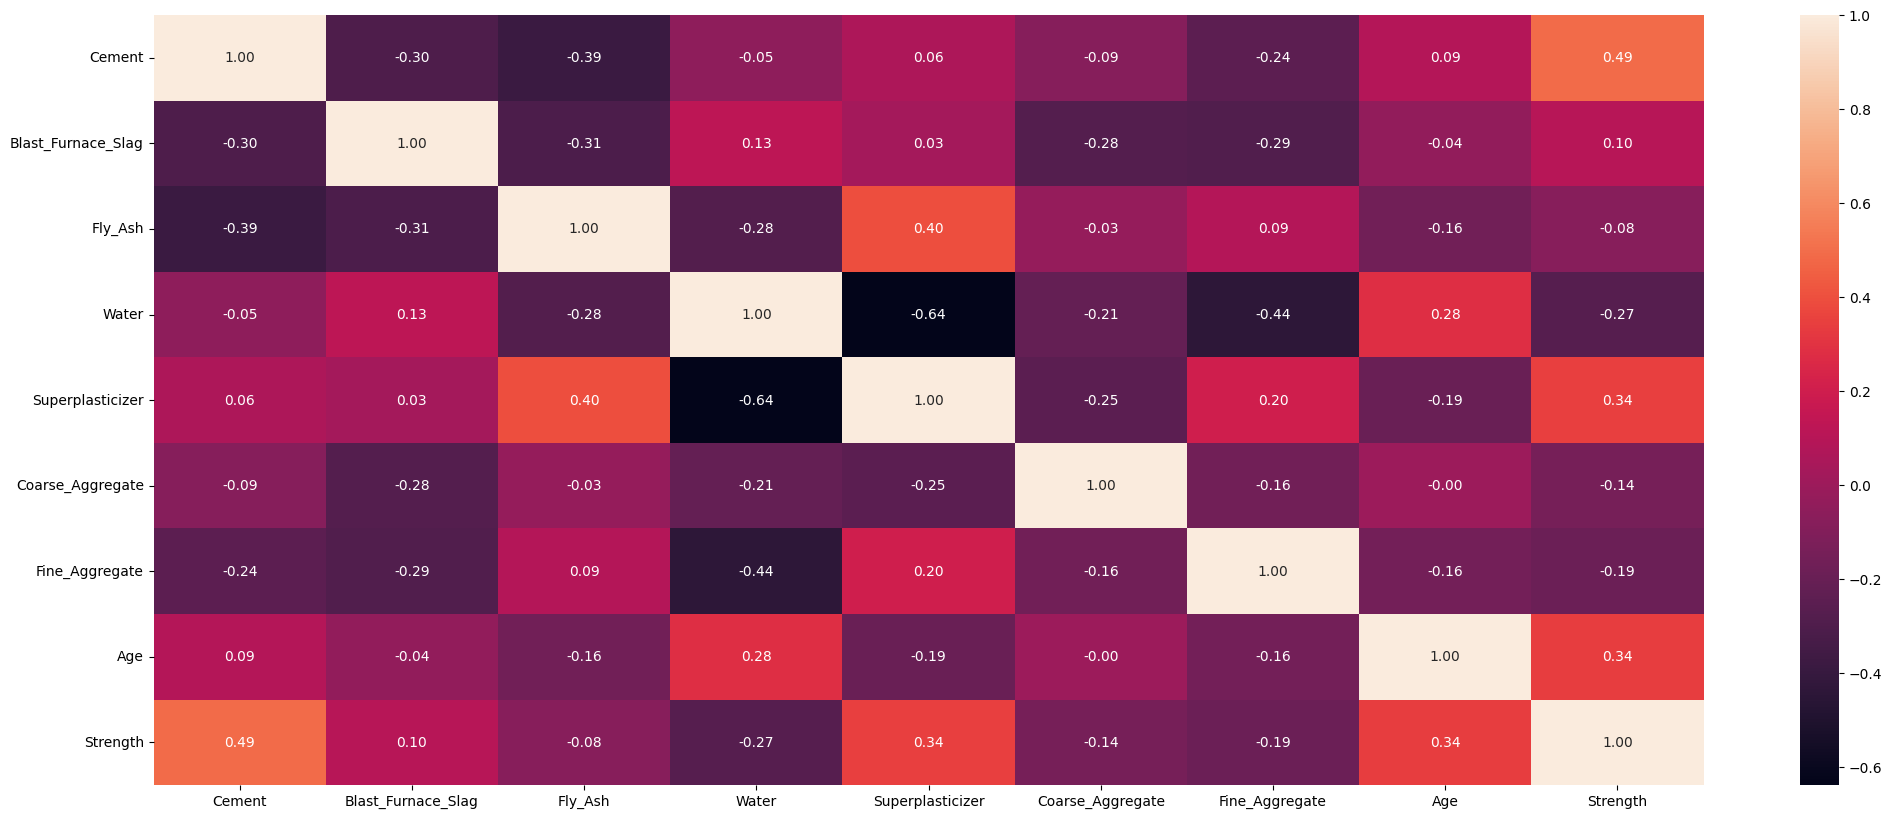

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

0       79
1       61
2       40
3       41
4       44
        ..
1025    44
1026    31
1027    23
1028    32
1029    32
Name: Strength, Length: 1005, dtype: int64


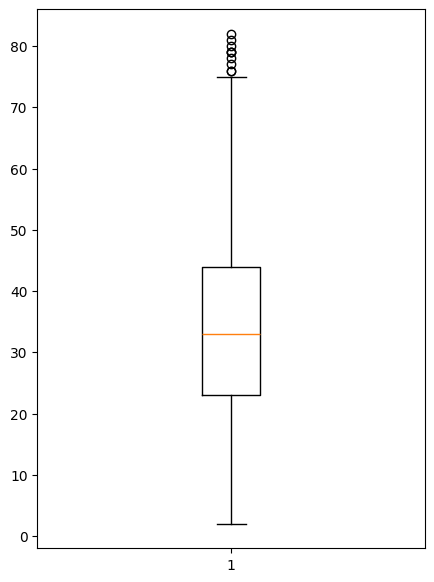

In [ ]:
#creating dataset
np.random.seed(10)
Data=data["Strength"]
print(Data)
fig = plt.figure(figsize=(5, 7))

#creating plot
plt.boxplot(Data)

#show plot
plt.show()

In [ ]:
# Scaling and Splitting the Data
X = data.drop(columns=["Strength"])  # Features
y = data["Strength"]  # Target variable

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=50, random_state=42),
}


In [ ]:
# Updated Evaluation Function
def evaluate_model_full(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics for Training Data
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    # Metrics for Testing Data
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    return {
        "Train": {"R2 Score": train_r2, "MAE": train_mae, "MSE": train_mse, "RMSE": train_rmse},
        "Test": {"R2 Score": test_r2, "MAE": test_mae, "MSE": test_mse, "RMSE": test_rmse}
    }, y_test_pred

# Evaluate all models
all_results = {}
predictions = {}

for name, model in models.items():
    all_results[name], predictions[name] = evaluate_model_full(model, X_train, X_test, y_train, y_test)

# Display Results
for model_name, metrics in all_results.items():
    print(f"Model: {model_name}")
    for dataset, dataset_metrics in metrics.items():
        print(f"  {dataset} Data:")
        for metric_name, value in dataset_metrics.items():
            print(f"    {metric_name}: {value:.4f}")
    print()


Model: Linear Regression
  Train Data:
    R2 Score: 0.6104
    MAE: 7.9593
    MSE: 99.8598
    RMSE: 9.9930
  Test Data:
    R2 Score: 0.5802
    MAE: 8.8779
    MSE: 124.8915
    RMSE: 11.1755

Model: Lasso Regression
  Train Data:
    R2 Score: 0.6104
    MAE: 7.9595
    MSE: 99.8605
    RMSE: 9.9930
  Test Data:
    R2 Score: 0.5803
    MAE: 8.8773
    MSE: 124.8652
    RMSE: 11.1743

Model: Random Forest
  Train Data:
    R2 Score: 0.9830
    MAE: 1.4013
    MSE: 4.3686
    RMSE: 2.0901
  Test Data:
    R2 Score: 0.9052
    MAE: 3.5379
    MSE: 28.2010
    RMSE: 5.3105

Model: XGBoost
  Train Data:
    R2 Score: 0.9917
    MAE: 0.8494
    MSE: 2.1370
    RMSE: 1.4619
  Test Data:
    R2 Score: 0.9225
    MAE: 3.1202
    MSE: 23.0415
    RMSE: 4.8002



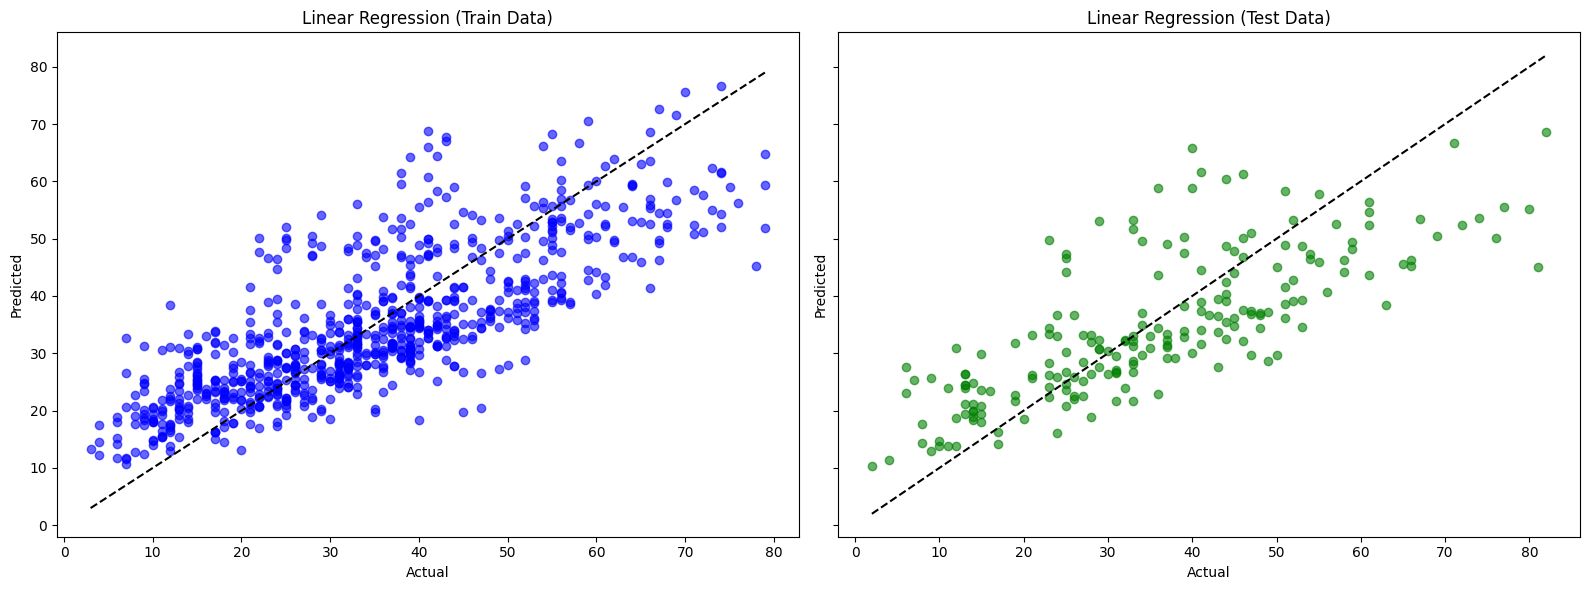

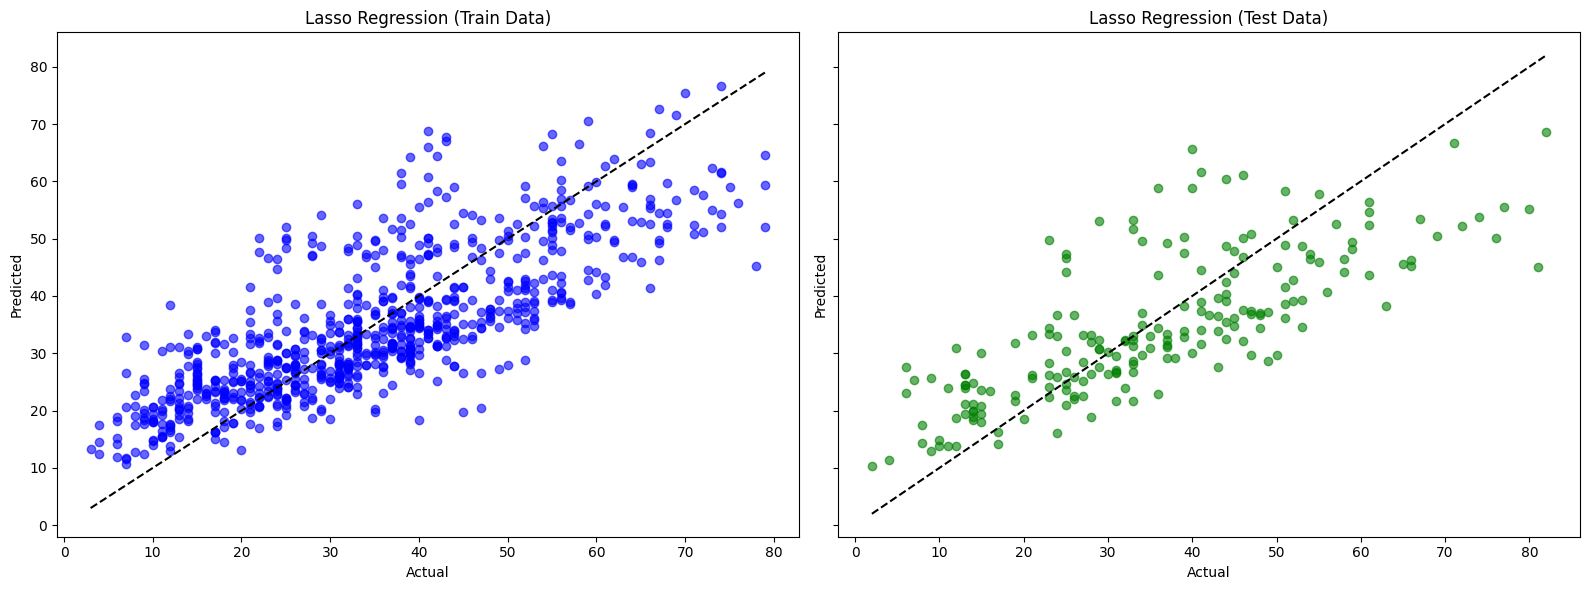

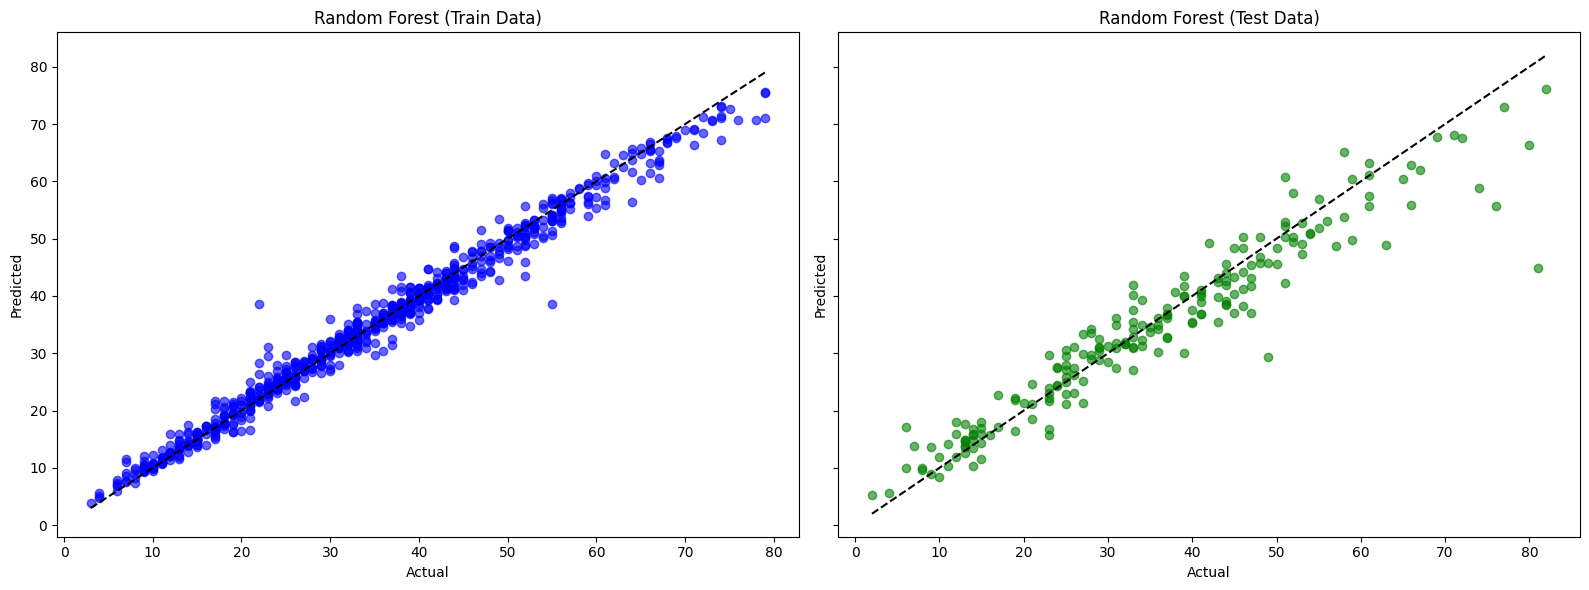

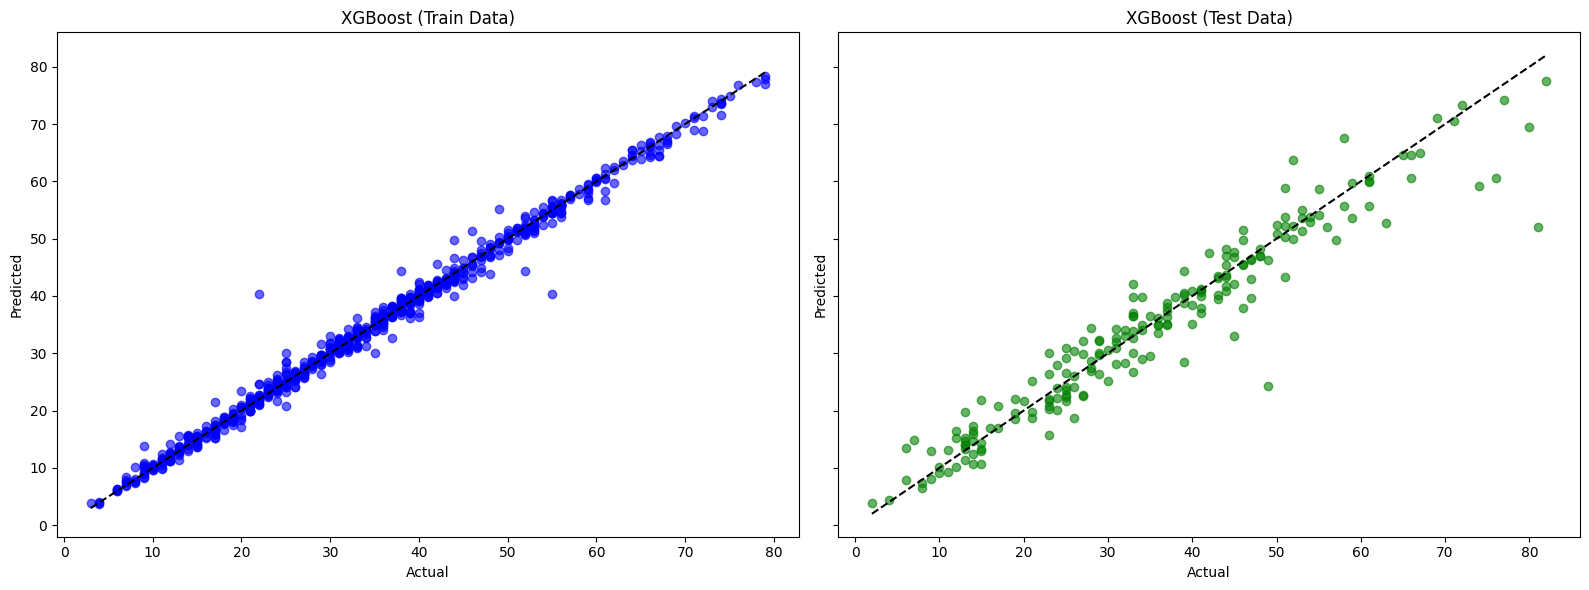

In [ ]:
# Visualization: Actual vs Predicted
def plot_actual_vs_predicted(model_name, y_train, y_train_pred, y_test, y_test_pred):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # Training Data
    axes[0].scatter(y_train, y_train_pred, color="blue", alpha=0.6)
    axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k')
    axes[0].set_title(f"{model_name} (Train Data)")
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predicted")

    # Testing Data
    axes[1].scatter(y_test, y_test_pred, color="green", alpha=0.6)
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
    axes[1].set_title(f"{model_name} (Test Data)")
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predicted")

    plt.tight_layout()
    plt.show()

# Generate Predictions and Plot for Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    plot_actual_vs_predicted(name, y_train, y_train_pred, y_test, y_test_pred)

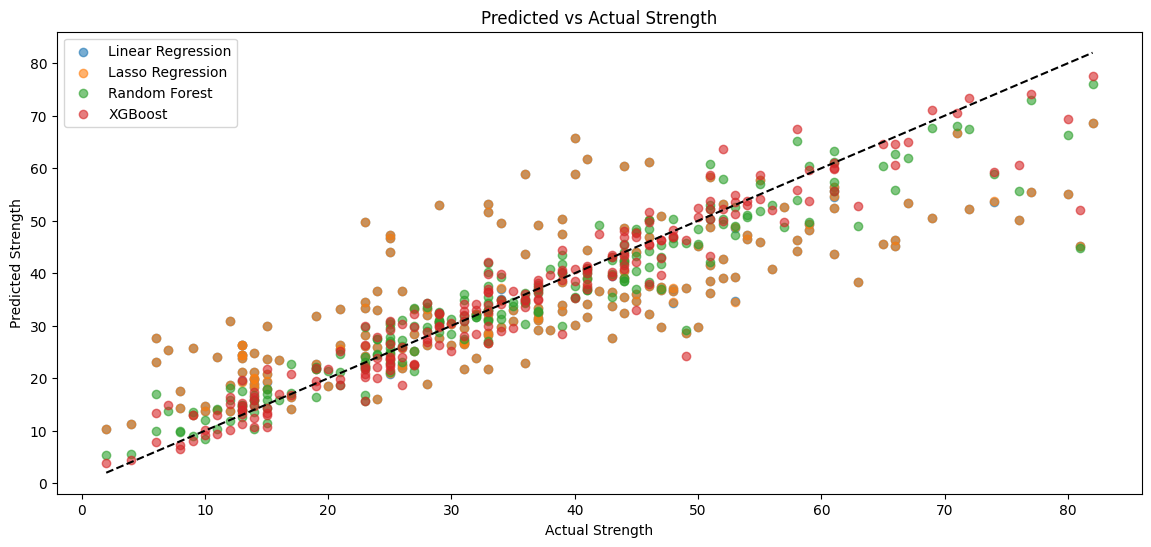

In [ ]:
# Visualization: Predicted vs Actual
plt.figure(figsize=(14, 6))
for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Predicted vs Actual Strength")
plt.legend()
plt.show()


In [ ]:
# Fine-tuning Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2')
grid_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Fine-tuning XGBoost
param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 10]
}

grid_xgb = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring='r2')
grid_xgb.fit(X_train, y_train)
print("Best Parameters for XGBoost:", grid_xgb.best_params_)



Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
# Final Ensemble Prediction
best_rf = grid_rf.best_estimator_
best_xgb = grid_xgb.best_estimator_

rf_pred = best_rf.predict(X_test)
xgb_pred = best_xgb.predict(X_test)

ensemble_pred = (rf_pred + xgb_pred) / 2

In [ ]:
# Evaluate Ensemble Model on Train Data
ensemble_train_pred = (best_rf.predict(X_train) + best_xgb.predict(X_train)) / 2
ensemble_train_r2 = r2_score(y_train, ensemble_train_pred)
ensemble_train_mae = mean_absolute_error(y_train, ensemble_train_pred)
ensemble_train_mse = mean_squared_error(y_train, ensemble_train_pred)
ensemble_train_rmse = np.sqrt(ensemble_train_mse)

# Evaluate Ensemble Model on Test Data
ensemble_test_pred = (rf_pred + xgb_pred) / 2
ensemble_test_r2 = r2_score(y_test, ensemble_test_pred)
ensemble_test_mae = mean_absolute_error(y_test, ensemble_test_pred)
ensemble_test_mse = mean_squared_error(y_test, ensemble_test_pred)
ensemble_test_rmse = np.sqrt(ensemble_test_mse)

# Print Ensemble Evaluation Metrics
print("Ensemble Model Performance:")
print("Train Data:")
print(f"  R2 Score: {ensemble_train_r2:.4f}")
print(f"  MAE: {ensemble_train_mae:.4f}")
print(f"  MSE: {ensemble_train_mse:.4f}")
print(f"  RMSE: {ensemble_train_rmse:.4f}")
print("Test Data:")
print(f"  R2 Score: {ensemble_test_r2:.4f}")
print(f"  MAE: {ensemble_test_mae:.4f}")
print(f"  MSE: {ensemble_test_mse:.4f}")
print(f"  RMSE: {ensemble_test_rmse:.4f}")


Ensemble Model Performance:
Train Data:
  R2 Score: 0.9832
  MAE: 1.4284
  MSE: 4.3149
  RMSE: 2.0772
Test Data:
  R2 Score: 0.9297
  MAE: 3.1167
  MSE: 20.9223
  RMSE: 4.5741


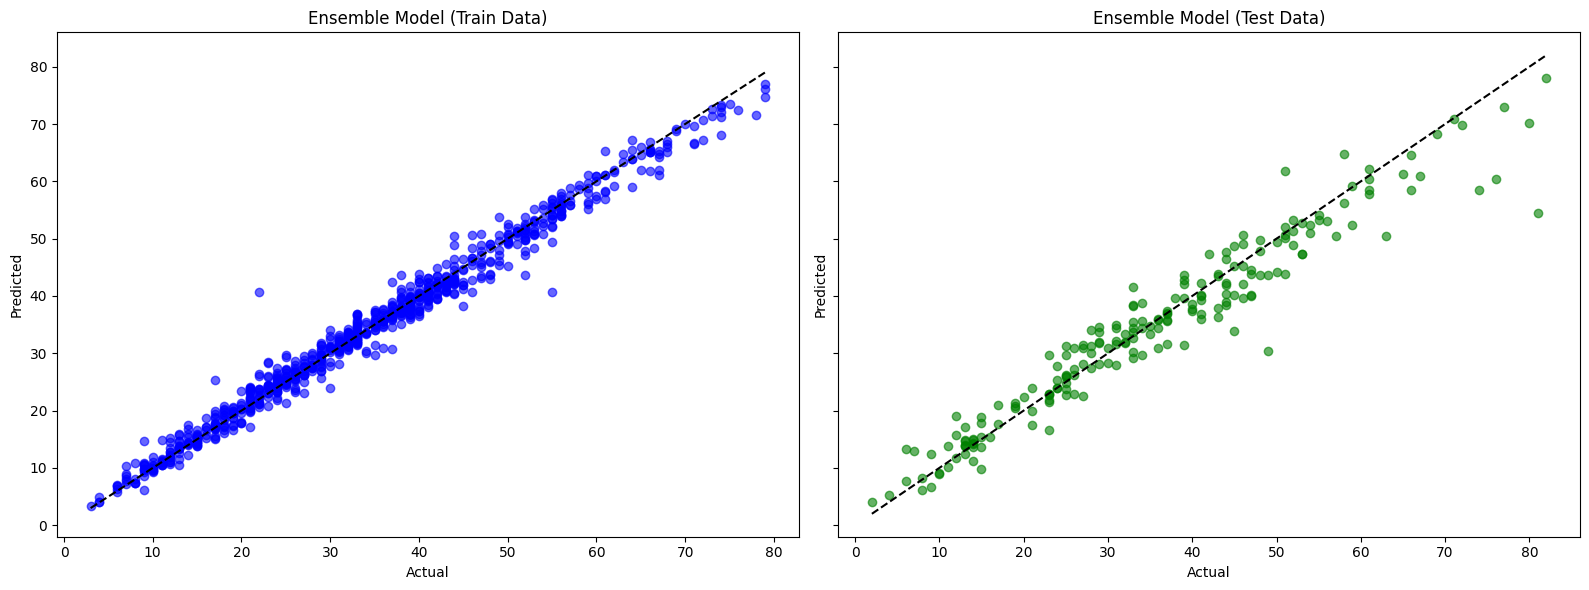

In [ ]:
# Plot for Ensemble Model
ensemble_train_pred = (best_rf.predict(X_train) + best_xgb.predict(X_train)) / 2
ensemble_test_pred = (rf_pred + xgb_pred) / 2
plot_actual_vs_predicted("Ensemble Model", y_train, ensemble_train_pred, y_test, ensemble_test_pred)


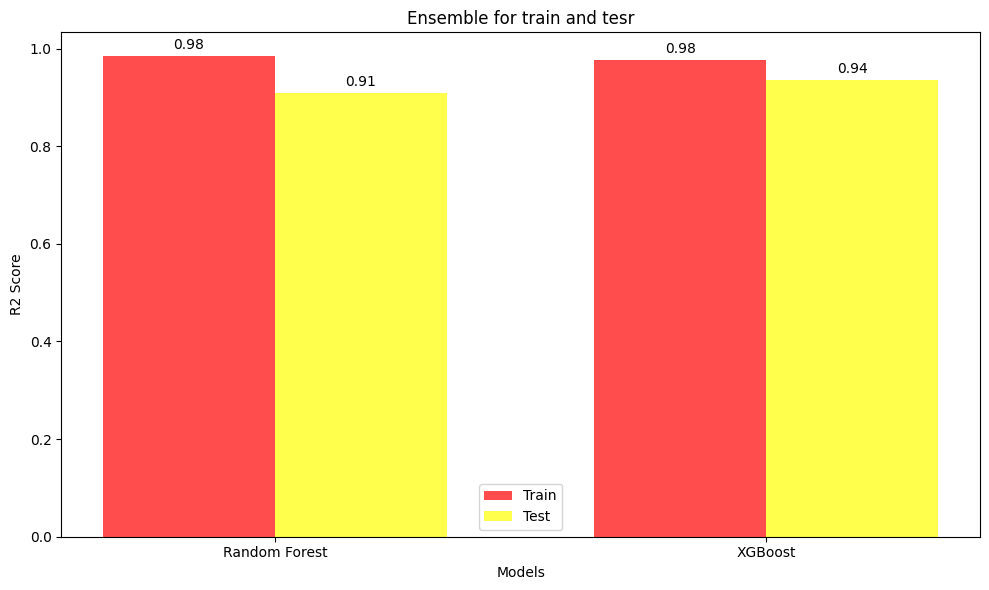

In [ ]:
# Evaluate Training Performance for Random Forest and XGBoost
rf_train_pred = best_rf.predict(X_train)
xgb_train_pred = best_xgb.predict(X_train)

rf_train_r2 = r2_score(y_train, rf_train_pred)
xgb_train_r2 = r2_score(y_train, xgb_train_pred)

rf_test_r2 = r2_score(y_test, rf_pred)
xgb_test_r2 = r2_score(y_test, xgb_pred)

# Bar Graph Data
models = ["Random Forest", "XGBoost"]
train_r2_scores = [rf_train_r2, xgb_train_r2]
test_r2_scores = [rf_test_r2, xgb_test_r2]

# Bar Graph Plot
x = np.arange(len(models))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_r2_scores, width, label="Train", color="red", alpha=0.7)
bars2 = ax.bar(x + width/2, test_r2_scores, width, label="Test", color="yellow", alpha=0.7)

# Add labels, title, and custom ticks
ax.set_xlabel("Models")
ax.set_ylabel("R2 Score")
ax.set_title("Ensemble for train and tesr")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above bar
                    textcoords="offset points",
                    ha="center", va="bottom")

plt.tight_layout()
plt.show()


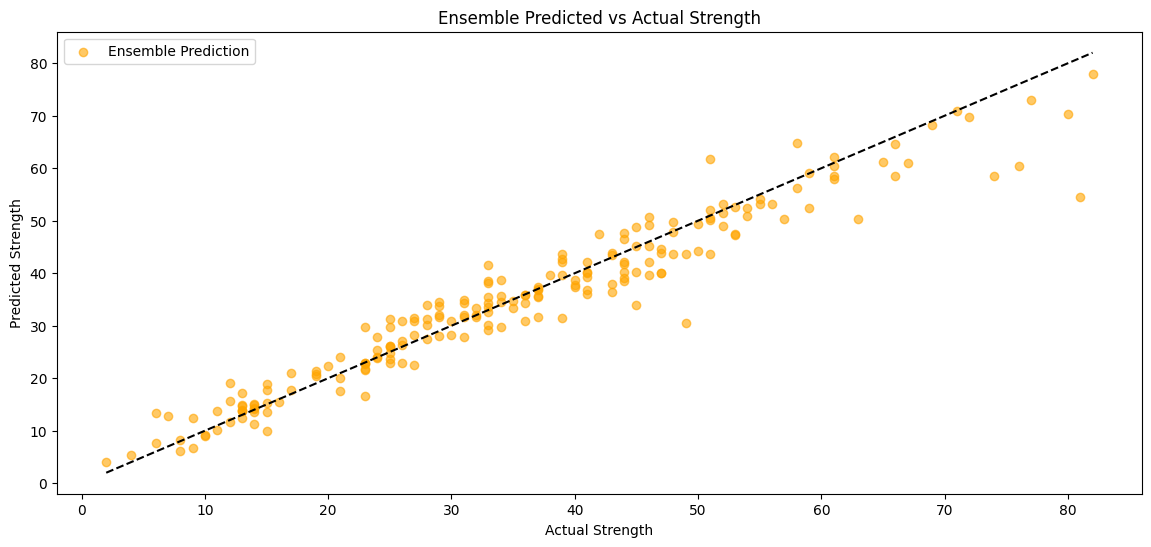

In [ ]:
# Final Visualization: Predicted vs Actual
plt.figure(figsize=(14, 6))
plt.scatter(y_test, ensemble_pred, alpha=0.6, label="Ensemble Prediction", color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Ensemble Predicted vs Actual Strength")
plt.legend()
plt.show()